# CS512 (AI) Lab Assignment - 1 

###**Due on: 6th Feb 2022 2400 Hrs | Total Marks: 100**

**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Armaan Garg, 2019CSZ0002@iitrpr.ac.in
*   Shivam Kainth shivam.20csz0006@iitrpr.ac.in

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment1 then you should name the colab file as: ABC_2019csx1234_Lab1.ipynb


The purpose of this assignment is to exercise your basic understanding of intelligent agents and state space search, and to help you apply these concepts.
In this assignment, you will be experimenting with different AI search techniques that has been discussed in class. You are provided with a starter code for this. The code consists of several segments, some of which you will need to read and understand to complete the assignment, and some of which you can ignore.


# Problem Statement 1 (60 marks)

##Save the world from Cersei Lannister (in a maze game setup).##

Story:
Melisandre, also known as red woman, was born in the city of Melony (this city lies in the centre of the maze world), and is known to have supernatural powers. She has been known to be lived for 2000 years and used her sorcery to save the world from evil lannisters. It has been recently known that her immortality comes from the pendant she wears and few wise men say that the owner can only live for a few seconds without the magical pendant.	
But on a very dark day, evil Cersei Lannister stole her pendant and hidden herself into an unknown city of labyrinths. Now it’s our time to save the world and find Cersei as soon as possible and return the pendant to Melisandre and return balance to the world. Thanks to AI this could be done in a very fast and efficient manner. 
Agent Jon Snow (the AI master) is put up to the task of finding the pendant. Thanks to agent Snow we came to know the location of where cercei is hiding and we also have the maze world map. But it will take ages for a person to reach there but with agent snow’s AI mastership this could be done in mere seconds. 
_______________________________________

The maze world is generated from empty grid and then adding walls of random length to random locations.

The goal is to find a path from corner to corner. Possible moves are Up, Down, Left or Right. Distance or length is measured with manhattan distance which is the sum of vertical and horizontal lengths.

Algorithms to compare to find a path :


*   BFS: breadth first search (10 marks)
*   DFS: depth first search  (10 marks)
*   UCS: Uniform-Cost Search  (10 marks)
*   IDS: Iterative Deepning Search (10 marks)
*   A* (A-star) heuristic Search (20 marks)


### Write code in Algorithm section below###

There are two performance metrics:

1.   Number of nodes explored
2.   Time taken for execution

###You need to plot graphs for both the metrics. Also, write your observations by pointing out the key differnces among the algorithms. (Use Graph plots & Observations section below to write your code)###

# The maze

In [ ]:
import numpy as np


def create_maze(size, n_walls, length_walls=0.3):
    maze = np.ones((size, size), dtype=bool)

    for i in range(n_walls):
        row, col = np.random.randint(0, size - 1, 2)

        wall = np.random.poisson(length_walls) * np.random.choice([-1, 1])

        if np.random.choice([True, False]):
            row = make_range(row, wall, size)
        else:
            col = make_range(col, wall, size)

        maze[row, col] = False

    maze[0, 0] = True
    maze[size - 1, size - 1] = True
    return maze


def make_range(start, length, m):
    d = np.clip(np.array([start + length, start]), 0, m - 1)
    return list(range(d.min(), d.max() + 1))


# Algorithm section

In [ ]:
"""
Write a function for each algorithm in this section
"""
def bfs( maze, start, goal): #BFS
  (x,y)=start
  fin=False
  count=0
  dict = {}
  queue=[]
  explored=[]
  visited={}
  for i in range(SIZE):
    for j in range(SIZE):
      visited[(i,j)]=0
  path=[]
  queue.append((x,y))
  visited[(x,y)]=1
  explored.append((x,y))
  while(queue):
    (x,y)=queue.pop(0)
    if((x,y)==goal):
      fin=True
      break
    if(x+1<SIZE):
      if(visited[(x+1,y)]!=1 and maze[(x+1,y)]==True):
        dict[(x+1,y)]= (x,y)
        visited[(x+1,y)]=1
        explored.append((x+1,y))
        queue.append((x+1,y))
    if(y+1<SIZE):
      if(visited[(x,y+1)]!=1 and maze[(x,y+1)]==True):
        dict[(x,y+1)]= (x,y)
        visited[(x,y+1)]=1
        explored.append((x,y+1))
        queue.append((x,y+1))
    if(x-1>=0):
      if(visited[(x-1,y)]!=1 and maze[(x-1,y)]==True):
        dict[(x-1,y)]= (x,y)
        visited[(x-1,y)]=1
        explored.append((x-1,y))
        queue.append((x-1,y))
    if(y-1>=0):
      if(visited[(x,y-1)]!=1 and maze[(x,y-1)]==True):
        dict[(x,y-1)]= (x,y)
        visited[(x,y-1)]=1
        explored.append((x,y-1))
        queue.append((x,y-1))
    count=count+1

  if(fin):
    while((x,y)!=start):
        path.append((x,y))
        (x,y)=dict[x,y]
    path.append(start)
    

  return fin, explored, path


def dfs( maze, start, goal):  #DFS
  (x,y)=start
  stack=[]
  visited={}
  for i in range(SIZE):
    for j in range(SIZE):
      visited[(i,j)]=0
  fin=False
  dict = {}
  path=[]
  explored=[]
  stack.append((x,y))
  visited[(x,y)]=1
  explored.append((x,y))
  while(stack):
    (x,y)=stack.pop()
    if((x,y)==goal):
      fin=True
      break
    if(x+1<SIZE):
      if(visited[(x+1,y)]!=1 and maze[(x+1,y)]==True):
        dict[(x+1,y)]= (x,y)
        visited[(x+1,y)]=1
        explored.append((x+1,y))
        stack.append((x+1,y))
    if(y+1<SIZE):
      if(visited[(x,y+1)]!=1 and maze[(x,y+1)]==True):
        dict[(x,y+1)]= (x,y)
        visited[(x,y+1)]=1
        explored.append((x,y+1))
        stack.append((x,y+1))
    if(x-1>=0):
      if(visited[(x-1,y)]!=1 and maze[(x-1,y)]==True):
        dict[(x-1,y)]= (x,y)
        visited[(x-1,y)]=1
        explored.append((x-1,y))
        stack.append((x-1,y))
    if(y-1>=0):
      if(visited[(x,y-1)]!=1 and maze[(x,y-1)]==True):
        dict[(x,y-1)]= (x,y)
        visited[(x,y-1)]=1
        explored.append((x,y-1))
        stack.append((x,y-1))
    
  if(fin):
    while((x,y)!=start):
        path.append((x,y))
        (x,y)=dict[x,y]
    path.append(start)
    

  return fin, explored, path

def ucs( maze, start, goal):  #UCS
  (x,y)=start
  cost={}
  fin=False
  dict = {}
  path=[]
  explored=[]
  from queue import PriorityQueue
  pq = PriorityQueue()
  for i in range(SIZE):
    for j in range(SIZE):
      cost[(i,j)]=1000000

  cost[(x,y)]=0
  pq.put((cost[(x,y)],(x,y)))
  explored.append((x,y))
  while not pq.empty():
    it=pq.get()
    (x,y)=it[1]
    if((x,y)==goal):
      fin=True
      break
    if(x+1<SIZE):
      if(maze[(x+1,y)]==True):
        if(cost[(x+1,y)]>(cost[(x,y)]+1)):
          cost[(x+1),y]=(cost[(x,y)]+1)
          dict[(x+1,y)]= (x,y)
          explored.append((x+1,y))
          pq.put((cost[(x,y)]+1,(x+1,y)))
        

    if(y+1<SIZE):
      if(maze[(x,y+1)]==True):
        if(cost[(x,y+1)]>(cost[(x,y)]+1)):
          cost[(x,y+1)]=(cost[(x,y)]+1)
          dict[(x,y+1)]= (x,y)
          explored.append((x,y+1))
          pq.put((cost[(x,y)]+1,(x,y+1)))
    

    if(x-1>=0):
      if(maze[(x-1,y)]==True):
        if(cost[(x-1,y)]>(cost[(x,y)]+1)):
          cost[(x-1,y)]=(cost[(x,y)]+1)
          dict[(x-1,y)]= (x,y)
          explored.append((x-1,y))
          pq.put((cost[(x,y)]+1,(x-1,y)))
        
    if(y-1>=0):
      if(maze[(x,y-1)]==True):
        if(cost[(x,y-1)]>(cost[(x,y)]+1)):
          cost[(x,y-1)]=(cost[(x,y)]+1)
          dict[(x,y-1)]= (x,y)
          explored.append((x,y-1))
          pq.put((cost[(x,y)]+1,(x,y-1)))
        

  if(fin):
    while((x,y)!=start):
        path.append((x,y))
        (x,y)=dict[x,y]
    path.append(start)
    

  return fin, explored, path


def dfs_ids(maze , start, goal, threshold):
  depth=0
  (x,y)=start
  stack=[]
  visited={}
  explored=[]
  fin=False
  dict = {}
  height = {}
  path=[]
  for i in range(SIZE):
    for j in range(SIZE):
      visited[(i,j)]=0
  stack.append((x,y))
  visited[(x,y)]=1
  explored.append((x,y))
  height[(x,y)]=0
  while(stack):
    depth=depth+1
    (x,y)=stack.pop()
    if((x,y)==goal):
      fin=True
      break
    if(x+1<SIZE):
      if(visited[(x+1,y)]!=1 and maze[(x+1,y)]==True and height[(x,y)]<threshold):
        dict[(x+1,y)]= (x,y)
        visited[(x+1,y)]=1
        explored.append((x+1,y))
        stack.append((x+1,y))
        height[(x+1,y)]=height[(x,y)]+1
    if(y+1<SIZE):
      if(visited[(x,y+1)]!=1 and maze[(x,y+1)]==True and height[(x,y)]<threshold):
        dict[(x,y+1)]= (x,y)
        visited[(x,y+1)]=1
        explored.append((x,y+1))
        stack.append((x,y+1))
        height[(x,y+1)]=height[(x,y)]+1
    if(x-1>=0):
      if(visited[(x-1,y)]!=1 and maze[(x-1,y)]==True and height[(x,y)]<threshold):
        dict[(x-1,y)]= (x,y)
        visited[(x-1,y)]=1
        explored.append((x-1,y))
        stack.append((x-1,y))
        height[(x-1,y)]=height[(x,y)]+1
    if(y-1>=0):
      if(visited[(x,y-1)]!=1 and maze[(x,y-1)]==True and height[(x,y)]<threshold):
        dict[(x,y-1)]= (x,y)
        visited[(x,y-1)]=1
        explored.append((x,y-1))
        stack.append((x,y-1))
        height[(x,y-1)]=height[(x,y)]+1
    
  if(fin):
    while((x,y)!=start):
        path.append((x,y))
        (x,y)=dict[x,y]
    path.append(start)
    

  return fin, explored, path


def ids( maze, start, goal):   #IDS
  explore=[]
  fin=False
  path=[]
  

  
  total=SIZE**2
  i=0
  while(i<=total):
    fin, explore, path=dfs_ids(maze , start, goal, i)
    if(fin==True):
      break
    else:
      i=i+total
  
  return fin, explore, path


def heuristic(curr, goal):
  n1,n2=curr
  g1,g2=goal

  res= abs(n1-n2) + abs(g1-g2)

  return res



def astar( maze, start, goal):  # A*
  (x,y)=start
  explored=[]
  fin=False
  dict = {}
  path = []
  gn={}
  fn={}
  for i in range(SIZE):
    for j in range(SIZE):
      gn[(i,j)]=float('inf')
      fn[(i,j)]=float('inf')
  gn[(x,y)]=0
  fn[(x,y)]= heuristic((x,y), goal) + gn[(x,y)]
  from queue import PriorityQueue
  prq = PriorityQueue()
  prq.put((fn[(x,y)],heuristic((x,y), goal), (x,y)))
  explored.append((x,y))
  while not prq.empty():
    (x,y)=prq.get()[2]
    if((x,y)==goal):
      fin=True
      break
    if(x+1<SIZE):
      if(maze[(x+1,y)]==True):
        if(fn[(x+1,y)]>(heuristic((x+1,y), goal) + gn[(x,y)]+1)):
          gn[(x+1,y)]=gn[(x,y)]+1
          fn[(x+1,y)]=heuristic((x+1,y), goal) + gn[(x+1,y)]
          dict[(x+1,y)]= (x,y)
          explored.append((x+1,y))
          prq.put((fn[(x+1,y)],heuristic((x+1,y), goal), (x+1,y)))
        

    if(y+1<SIZE):
      if(maze[(x,y+1)]==True):
        if(fn[(x,y+1)]>(heuristic((x,y+1), goal) + gn[(x,y)]+1)):
          gn[(x,y+1)]=gn[(x,y)]+1
          fn[(x,y+1)]=heuristic((x,y+1), goal) + gn[(x,y+1)]
          dict[(x,y+1)]= (x,y)
          explored.append((x,y+1))
          prq.put((fn[(x,y+1)],heuristic((x,y+1), goal), (x,y+1)))
    

    if(x-1>=0):
      if(maze[(x-1,y)]==True):
        if(fn[(x-1,y)]>(heuristic((x-1,y), goal) + gn[(x,y)]+1)):
          gn[(x-1,y)]=gn[(x,y)]+1
          fn[(x-1,y)]=heuristic((x-1,y), goal) + gn[(x-1,y)]
          dict[(x-1,y)]= (x,y)
          explored.append((x-1,y))
          prq.put((fn[(x-1,y)],heuristic((x-1,y), goal), (x-1,y)))
        
    if(y-1>=0):
      if(maze[(x,y-1)]==True):
        if(fn[(x,y-1)]>(heuristic((x,y-1), goal) + gn[(x,y)]+1)):
          gn[(x,y-1)]=gn[(x,y)]+1
          fn[(x,y-1)]=heuristic((x,y-1), goal) + gn[(x,y-1)]
          dict[(x,y-1)]= (x,y)
          explored.append((x,y-1))
          prq.put((fn[(x,y-1)],heuristic((x,y-1), goal), (x,y-1)))
        

  if(fin):
    while((x,y)!=start):
        path.append((x,y))
        (x,y)=dict[x,y]
    path.append(start)
    

  return fin, explored, path







# Execution section

In [ ]:
from collections import namedtuple #Like the dictionary type objects, it contains keys and that are mapped 
#to some values. In this case we can access the elements using keys and indexes.

from functools import partial # You can create partial functions in python by using the partial function from 
#the functools library. Partial functions allow one to derive a function with x parameters to a function 
#with fewer parameters and fixed values set for the more limited function.

from timeit import default_timer as timer
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tabulate #Tabulate is an open-source python package/module which is used to print 
#tabular data in nicely formatted tables

import tqdm
import os

np.random.seed(0)

SIZE = 100
START = (0, 0) 
GOAL = (SIZE - 1, SIZE - 1)
OBSTACLE_COUNT = SIZE ** 2 // 30
OBSTACLE_SIZE = 7

ALGOS = [
    ("DFS", partial(dfs, start=START, goal=GOAL)),
    ("BFS", partial(bfs, start=START, goal=GOAL)),
    ("UCS", partial(ucs, start=START, goal=GOAL)),
    ("IDS", partial(ids, start=START, goal=GOAL)),
    (
        "A-star",
        partial(astar, start=START, goal=GOAL),
    ),
]

Result = namedtuple(
    "Result", ["round", "finished", "n_explored", "length_path", "seconds", "algo"]
)


def simulate(n, max_good_mazes=float("inf")):
    results = []
    good_mazes = []
    for i in tqdm.tqdm(range(n), mininterval=1):
        maze = create_maze(SIZE, OBSTACLE_COUNT, OBSTACLE_SIZE)
        for algo_name, algo in ALGOS:
            time_start = timer()
            finished, explored_nodes, path = algo(maze)
            time_end = timer()
            r = Result(
                round=i,
                finished=finished,
                n_explored=len(explored_nodes),
                length_path=None if not finished else len(path),
                seconds=time_end - time_start,
                algo=algo_name,
            )
            results.append(r)
            if finished and algo_name == ALGOS[0][0]:
                good_mazes.append(maze)
                if len(good_mazes) >= max_good_mazes:
                    break

    results_df = pd.DataFrame(results)
    return results_df, good_mazes

result_df, good_mazes = simulate(1000)

""" for reference to print the results in a table format"""
result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
 ].mean()

result_agg["count"] = result_df.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))
print("")
print(result_df)




100%|██████████| 1000/1000 [04:41<00:00,  3.55it/s]

| finished   | algo   |   seconds |   n_explored |   length_path |   count |
|:-----------|:-------|----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0608455 |      2898.16 |       nan     |     430 |
| False      | BFS    | 0.0140552 |      2725.14 |       nan     |     430 |
| False      | DFS    | 0.0142045 |      2725.14 |       nan     |     430 |
| False      | IDS    | 0.017495  |      2725.14 |       nan     |     430 |
| False      | UCS    | 0.0429792 |      2725.14 |       nan     |     430 |
| True       | A-star | 0.126115  |      6483.81 |       212.393 |     570 |
| True       | BFS    | 0.033923  |      7116.42 |       212.393 |     570 |
| True       | DFS    | 0.0272912 |      5991.59 |      1710.79  |     570 |
| True       | IDS    | 0.0332831 |      5991.59 |      1710.79  |     570 |
| True       | UCS    | 0.109999  |      7124.66 |       212.393 |     570 |

      round  finished  n_explored  length_path   seconds    algo
0         


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


# Observations from the table:


*   As we can see from the above table, **A-star, BFS, UCS** return the **least cost (optimal) solution.**
*   **A-star** return the least cost solution because it uses h(n) and g(n)  (f(n) = h(n) + g(n)) to find the goal state.


*   **BFS** tries to do level search i.e it searches all the states level-by-level until goal state is found. As in the maze problem all the operators have equal cost, so the BFS also returns us the least cost solution.
*   For **UCS**, I have taken cost of every step to be 1, that is why it also returns us the least cost solution as then it acts similar to BFS.


*   **DFS and IDS don't** necessarily return the **least least cost solution**.
*   **DFS** uses the depth first search technique.


*   **IDS** is similar to DFS, the only difference is searches only until a threshold value of depth. This threshold value keeps increasing by 1 until goal state is found.










# Graph plots & Observations

---

Plot graphs related to the various parameters of algorithms for the various test cases given in the next section. 

1.   Plot one graph, which compares the number of nodes explored by every algorithm, while solving the problem.

2.  Plot another graph, comparing the total time taken by each algorithm to complete the execution. 

## Libraries for reference
https://seaborn.pydata.org/

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

https://matplotlib.org/stable/tutorials/introductory/pyplot.html


 


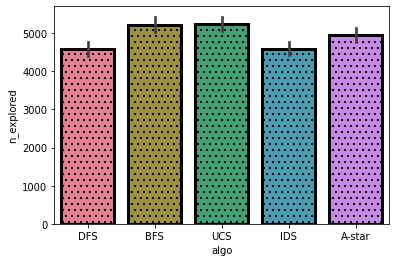

In [ ]:
""" graph plot code and observations"""
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="algo", y="n_explored",data=result_df, palette="husl",lw=3,ec="black",hatch="..")

**Observations:**


*   As we can see from the graph above, **BFS and UCS** return the most number of nodes explored.
*   **BFS** does level-by-level search so it explores all the nodes at one level and then only goes to the next level. So, the number of explored nodes increases significantly.


*   In the case of **UCS**, the nodes explored depends upen the cost to reach the node. But in our example all the costs are equal so UCS in our example acts similar to BFS. That is it also does level by level search to find the goal state. So, **BFS and UCS return the most and similar explored nodes**.
*   **DFS** does depth first search. So it tries to find the goal state as quickly as possible by not worrying about the cost of the search. DFS performs best with respect to space complexity.


*   **IDS** helps in avoiding dfs to go in an infinite path by giving a threshold value to depth. IDS keeps increasing this threshold value by 1 until goal state is found. So, number of nodes explored in IDS is also similar to DFS
*   Nodes explored in **A-star** depends upon h(n) and g(n) as f(n) helps us to decide which node to explore next. In our problem A-star returns less number of nodes explored than BFS and UCS but returns higher number of nodes explored than DFS and IDS.







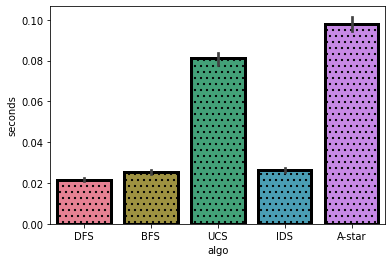

In [ ]:

sns.barplot(x="algo", y="seconds",data=result_df, palette="husl",lw=3,ec="black",hatch="..")

**Observations:**


*   **DFS** find the goal state in least time as it does the depth first search. It tries to find the goal state as quickly as possible without worrying about the optimal cost.
*   **BFS** takes more time than DFS as it does level by level search where it doesn't care about time to find the goal state. It tries to find the goal state in each level.


*   **IDS** also takes more time than DFS as IDS does repetitive work as in it keeps changing the threshold value and keeps on finding the goal state from the initial state. So it does more work than DFS and hence takes more time.
*  **UCS** takes more time than DFS, BFS and IDS as I have used priority queue in UCS as it find the next least cost state. So a lot of time is taken in inserting child states into the priority queue as priority queue is always sorted.


*   **A-star** takes the most time to find the goal state due to 2 reasons: first that it also uses a priority queue to insert f(n) of child states as our next state is the least f(n) of child states and we know that priority queue is sorted by default. Second reason is that f(n) depends upon h(n) and g(n). So a wrong heuristic function h(n) can take us further away from the goal state which will result in furter delay to find the goal state.








### Test Case 1:


In [ ]:
START = (1, 1) 
GOAL = (SIZE - 1, SIZE - 1)
result_df, good_mazes = simulate(1000)
result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
 ].mean()

result_agg["count"] = result_df.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))


100%|██████████| 1000/1000 [04:31<00:00,  3.68it/s]

| finished   | algo   |   seconds |   n_explored |   length_path |   count |
|:-----------|:-------|----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0545113 |      2544.48 |       nan     |     447 |
| False      | BFS    | 0.0125716 |      2387.55 |       nan     |     447 |
| False      | DFS    | 0.0128738 |      2387.55 |       nan     |     447 |
| False      | IDS    | 0.0158832 |      2387.55 |       nan     |     447 |
| False      | UCS    | 0.038111  |      2387.55 |       nan     |     447 |
| True       | A-star | 0.125867  |      6492.28 |       212.573 |     553 |
| True       | BFS    | 0.0337167 |      7119.02 |       212.573 |     553 |
| True       | DFS    | 0.0270358 |      6026.42 |      1718.37  |     553 |
| True       | IDS    | 0.0333984 |      6026.42 |      1718.37  |     553 |
| True       | UCS    | 0.110589  |      7127.03 |       212.573 |     553 |



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


### Test Case 2

In [ ]:
START = (2, 0) 
GOAL = (SIZE - 1, SIZE - 1)
result_df, good_mazes = simulate(1000)
result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
 ].mean()

result_agg["count"] = result_df.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))


100%|██████████| 1000/1000 [05:03<00:00,  3.30it/s]

| finished   | algo   |   seconds |   n_explored |   length_path |   count |
|:-----------|:-------|----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.06111   |      2550.17 |       nan     |     420 |
| False      | BFS    | 0.0141315 |      2399.55 |       nan     |     420 |
| False      | DFS    | 0.0142449 |      2399.55 |       nan     |     420 |
| False      | IDS    | 0.0174324 |      2399.55 |       nan     |     420 |
| False      | UCS    | 0.042625  |      2399.55 |       nan     |     420 |
| True       | A-star | 0.137076  |      6469.56 |       211.986 |     580 |
| True       | BFS    | 0.0371215 |      7141.54 |       211.986 |     580 |
| True       | DFS    | 0.0295919 |      6016.55 |      1742.84  |     580 |
| True       | IDS    | 0.0364341 |      6016.55 |      1742.84  |     580 |
| True       | UCS    | 0.119731  |      7149.51 |       211.986 |     580 |



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


### Test Case 3

In [ ]:
START = (1, 0) 
GOAL = (SIZE - 2, SIZE - 1)
result_df, good_mazes = simulate(1000)
result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
 ].mean()

result_agg["count"] = result_df.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))


100%|██████████| 1000/1000 [04:45<00:00,  3.50it/s]

| finished   | algo   |   seconds |   n_explored |   length_path |   count |
|:-----------|:-------|----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0566552 |      2501.33 |       nan     |     436 |
| False      | BFS    | 0.0132053 |      2345.64 |       nan     |     436 |
| False      | DFS    | 0.0135594 |      2345.64 |       nan     |     436 |
| False      | IDS    | 0.0166442 |      2345.64 |       nan     |     436 |
| False      | UCS    | 0.0396152 |      2345.64 |       nan     |     436 |
| True       | A-star | 0.129193  |      6404.31 |       212.791 |     564 |
| True       | BFS    | 0.0353462 |      7068.43 |       212.791 |     564 |
| True       | DFS    | 0.0287015 |      6038.74 |      1721.65  |     564 |
| True       | IDS    | 0.0352066 |      6038.74 |      1721.65  |     564 |
| True       | UCS    | 0.115519  |      7077.77 |       212.791 |     564 |



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


### Test Case 4

In [ ]:
START = (3, 0) 
GOAL = (SIZE - 1, SIZE - 2)
result_df, good_mazes = simulate(1000)
result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
 ].mean()

result_agg["count"] = result_df.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))


100%|██████████| 1000/1000 [04:45<00:00,  3.50it/s]

| finished   | algo   |   seconds |   n_explored |   length_path |   count |
|:-----------|:-------|----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0563928 |      2523.98 |       nan     |     436 |
| False      | BFS    | 0.0129011 |      2377.68 |       nan     |     436 |
| False      | DFS    | 0.0133671 |      2377.68 |       nan     |     436 |
| False      | IDS    | 0.0165134 |      2377.68 |       nan     |     436 |
| False      | UCS    | 0.0394647 |      2377.68 |       nan     |     436 |
| True       | A-star | 0.133014  |      6481.51 |       212.113 |     564 |
| True       | BFS    | 0.0350807 |      7115.84 |       212.113 |     564 |
| True       | DFS    | 0.027992  |      5943.71 |      1707.44  |     564 |
| True       | IDS    | 0.0341502 |      5943.71 |      1707.44  |     564 |
| True       | UCS    | 0.11493   |      7124.31 |       212.113 |     564 |



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


### Test Case 5

In [ ]:
START = (1, 3) 
GOAL = (SIZE - 1, SIZE - 3)
result_df, good_mazes = simulate(1000)
result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
 ].mean()

result_agg["count"] = result_df.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))


100%|██████████| 1000/1000 [04:52<00:00,  3.41it/s]

| finished   | algo   |   seconds |   n_explored |   length_path |   count |
|:-----------|:-------|----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0569865 |      2424.54 |       nan     |     421 |
| False      | BFS    | 0.0125182 |      2281.31 |       nan     |     421 |
| False      | DFS    | 0.0131363 |      2281.31 |       nan     |     421 |
| False      | IDS    | 0.0164046 |      2281.31 |       nan     |     421 |
| False      | UCS    | 0.0382529 |      2281.31 |       nan     |     421 |
| True       | A-star | 0.134035  |      6465.88 |       213.221 |     579 |
| True       | BFS    | 0.0367238 |      7085.64 |       213.221 |     579 |
| True       | DFS    | 0.0292772 |      5971.75 |      1685.41  |     579 |
| True       | IDS    | 0.0350747 |      5971.75 |      1685.41  |     579 |
| True       | UCS    | 0.117452  |      7094.15 |       213.221 |     579 |



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


# Problem Statement 2 (40 marks)
## So many Queens, how to manage?

During a gladiatorial contests at the roman empire, a fine king invited all his queens to witness the valour of the gladiators. However, the queens were not in likings of one-another and must not see eye-to-eye. Your job as the "Minister of Strategies" in King's office is to create a sitting arrangement for all queens, while keeping in mind that no two queens are in the "LINE OF SIGHT" of one another i.e. the queens must be avoided to be in the same row or column or diagonally. 

 The "minister of Strategies" had recently enrolled in the Class of Artificial Intellignece CS 512 and decided to use A* algorithm to solve the problem.


Heuristic to be used for this problem is " Number of attacked queens", where if any new queen is placed in "LINE of ATTACK" of other queen, the Heuristic is incremented by 1, else it is unchanged. 

**Can you propose a better heuristic for this problem? If yes, then compare the performance of A* with your proposed and the given heuristic. [15 marks]**

The G(n) function can be defined as the number of queens which are correctly placed at the given time. 
For eg:
if the state is  
0 0 1 0

1 0 0 0

1 0 0 0

0 0 0 1 

then only one queen is correctly placed while, three queens are in ATTACK mode.
#### Reference image
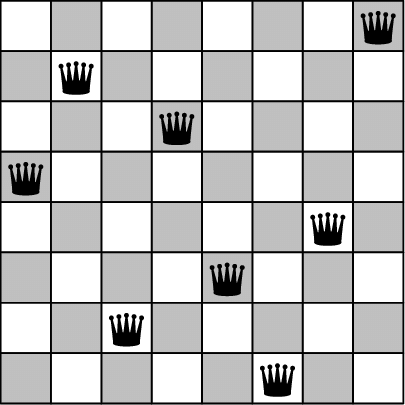


To solve this problem correctly. define the Heuristic function correctly, Apply A* agorithm to it and print the following information for each trial. Number of nodes explored, Optimal path cost, Total time taken for execution. [25 marks]

Consider in total, 5 trials,

 

---



1.   you have 4 queens in a 4x4 seating space.
2.   you have 5 queens in a 5x5 seating space.
3.   you have 6 queens in a 6x6 seating space.
4.  you have 7 queens in a 7x7 seating space.
5.  you have 8 queens in a 8x8 seating space.
5.  you have 9 queens in a 9x9 seating space.
5.  you have 10 queens in a 10x10 seating space.

----


In the end, plot a graph with all five trials in X-axis and following metrices in Y axis,
 * The number of nodes explored 
 * Optimnal path cost 
 * Total time taken by A* algorithm 

Define heuristics

In [ ]:
def queen_heuristic(seqs,size):
  state=[]
  attack_queens=0
  dictt={}
  for i in range(1, size+1):
    if seqs[i-1] != 0: 
      state.append((seqs[i-1],i-1))
  for (x,y) in state:
    for (i,j) in state:
      if((x,y)!=(i,j)):
        if(x==i or y==j or abs(x-i)==abs(y-j)):
          dictt[(i,j)]=1
          dictt[(x,y)]=1
  
  for val in dictt.values():
    if(val==1):
      attack_queens=attack_queens+1

  return attack_queens



  

# New Heusristic:


*   **New heuristic** is defined as the **total number of attacks** queens are making to each other.




In [ ]:
def new_heuristic(seqs,size): # defining a new heuristics 
  state=[]
  total_attacks=0
  dictt={}
  for i in range(1, size+1):
    if seqs[i-1] != 0: 
      state.append((seqs[i-1],i-1))
  for (x,y) in state:
    for (i,j) in state:
      if((x,y)!=(i,j)):
        if(x==i or y==j or abs(x-i)==abs(y-j)):
          total_attacks = total_attacks + 1
  
  

  return total_attacks


Your solution using A*

In [ ]:
# Your code goes here






def queenastar(size):  #calls original heuristic
  
  nodes_explored=1
  cost=0
  fin = False 
  from queue import PriorityQueue
  p_q = PriorityQueue()
  p_q.put((size,size,0,[0]*size))
  
  solution=[]

  while p_q: 
    state = p_q.get()  
    if(cost<=(state[2]*(state[2]-1))/2):
      cost=cost+ state[2]
    q_list = state[3]
    if(state[1] == 0 and state[2] == size): 
        fin = True 
        solution = state[3] 
        break
    rows = list(range(1, size+1))  

    if q_list.count(0) != 0: 
        for i in range(size): 
          col = q_list.index(0)
          nodes_explored=nodes_explored+1
          random.seed(27)
          ro = random.choice(rows)  
          rows.remove(ro)  
          cpy = list(q_list)
          cpy[col] = ro 
          val = size - cpy.count(0)
          
          h = queen_heuristic(cpy,size)
          #val= val-h
          fn = val + h
          p_q.put((fn,h,val ,cpy))  
          

  if(fin==True):
    
    print('Goal found')
  else:
    print('Goal cannot be found')

  
  return nodes_explored, cost, solution


def myqueenastar(size):  #calls new heuristic
  
  nodes_explored=1
  cost=0
  fin = False 
  from queue import PriorityQueue
  p_q = PriorityQueue()
  p_q.put((size,size,0,[0]*size))
  
  solution=[]

  while p_q: 
    state = p_q.get()  
    if(cost<=(state[2]*(state[2]-1))/2):
      cost=cost+ state[2]
    q_list = state[3]
    if(state[1] == 0 and state[2] == size): 
        fin = True 
        solution = state[3] 
        break
    rows = list(range(1, size+1))  

    if q_list.count(0) != 0: 
        for i in range(size): 
          col = q_list.index(0)
          nodes_explored=nodes_explored+1
          random.seed(27)
          ro = random.choice(rows)  
          rows.remove(ro)  
          cpy = list(q_list)
          cpy[col] = ro 
          val = size - cpy.count(0)
          h = new_heuristic(cpy,size)      
          #val= val-h
          fn = val + h
          p_q.put((fn,h,val ,cpy))  
         

  if(fin==True):
    
    print('Goal found')
    
  else:
    print('Goal cannot be found')

  
  return nodes_explored, cost, solution

I have created 2 functions: queenastar() and myqueenastar().

The only difference is queenastar() calls the original heuristic and myqueenastar() call the new heuristic.

#### Trial 1: 4 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 

import random
import time

size=4
nodes_exp_l = []
mynodes_exp = []
optimal_cost = []
myoptimal_cost = []
time_t = []
mytime_t = []


start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time0.00s
Number of Nodes explored :  61
Path Cost :  10

CHESS BOARD ===>
0 0 1 0 

0 0 0 0 

0 1 0 0 

0 0 0 1 


New heuristic :
Goal found
Time0.00s
Number of Nodes explored :  61
Path Cost :  10

CHESS BOARD ===>
0 0 1 0 

0 0 0 0 

0 1 0 0 

0 0 0 1 



The above output first shows the time, number of nodes explored, path cost for original heurstic and then for the new heuristic.

#### Trial 2: 5 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=5




start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time0.01s
Number of Nodes explored :  286
Path Cost :  15

CHESS BOARD ===>
0 1 0 0 0 

0 0 0 1 0 

0 0 0 0 0 

0 0 1 0 0 

0 0 0 0 1 


New heuristic :
Goal found
Time0.01s
Number of Nodes explored :  286
Path Cost :  15

CHESS BOARD ===>
0 1 0 0 0 

0 0 0 1 0 

0 0 0 0 0 

0 0 1 0 0 

0 0 0 0 1 



#### Trial 3: 6 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 

size=6


start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")


Goal found
Time0.05s
Number of Nodes explored :  1639
Path Cost :  21

CHESS BOARD ===>
0 0 1 0 0 0 

0 0 0 0 1 0 

0 0 0 0 0 0 

0 1 0 0 0 0 

0 0 0 1 0 0 

0 0 0 0 0 1 


New heuristic :
Goal found
Time0.05s
Number of Nodes explored :  1639
Path Cost :  21

CHESS BOARD ===>
0 0 1 0 0 0 

0 0 0 0 1 0 

0 0 0 0 0 0 

0 1 0 0 0 0 

0 0 0 1 0 0 

0 0 0 0 0 1 



#### Trial 4: 7 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=7


start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")


Goal found
Time0.27s
Number of Nodes explored :  9675
Path Cost :  28

CHESS BOARD ===>
0 1 0 0 0 0 0 

0 0 0 1 0 0 0 

0 0 0 0 0 1 0 

0 0 0 0 0 0 0 

0 0 1 0 0 0 0 

0 0 0 0 1 0 0 

0 0 0 0 0 0 1 


New heuristic :
Goal found
Time0.29s
Number of Nodes explored :  9052
Path Cost :  28

CHESS BOARD ===>
0 1 0 0 0 0 0 

0 0 0 1 0 0 0 

0 0 0 0 0 1 0 

0 0 0 0 0 0 0 

0 0 1 0 0 0 0 

0 0 0 0 1 0 0 

0 0 0 0 0 0 1 



#### Trial 5: 8 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=8



start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time2.12s
Number of Nodes explored :  65097
Path Cost :  36

CHESS BOARD ===>
0 1 0 0 0 0 0 0 

0 0 0 0 0 1 0 0 

0 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 0 

0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 

0 0 0 0 1 0 0 0 


New heuristic :
Goal found
Time1.65s
Number of Nodes explored :  53945
Path Cost :  36

CHESS BOARD ===>
0 1 0 0 0 0 0 0 

0 0 0 0 0 1 0 0 

0 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 0 

0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 

0 0 0 0 1 0 0 0 



#### Trial 6: 9 queens

In [ ]:
# Code to generate a 2D grid world
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size= 9



start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time18.33s
Number of Nodes explored :  491860
Path Cost :  45

CHESS BOARD ===>
0 1 0 0 0 0 0 0 0 

0 0 0 1 0 0 0 0 0 

0 0 0 0 0 0 1 0 0 

0 0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 0 

0 0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 1 0 

0 0 0 0 0 1 0 0 0 


New heuristic :
Goal found
Time13.26s
Number of Nodes explored :  363610
Path Cost :  45

CHESS BOARD ===>
0 1 0 0 0 0 0 0 0 

0 0 0 1 0 0 0 0 0 

0 0 0 0 0 0 1 0 0 

0 0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 0 

0 0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 1 0 

0 0 0 0 0 1 0 0 0 



#### Trial 7: 10 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size= 10



start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time165.54s
Number of Nodes explored :  3928951
Path Cost :  55

CHESS BOARD ===>
0 1 0 0 0 0 0 0 0 0 

0 0 0 1 0 0 0 0 0 0 

0 0 0 0 0 0 1 0 0 0 

0 0 0 0 0 0 0 0 1 0 

0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 0 0 

0 0 0 0 1 0 0 0 0 0 

0 0 0 0 0 0 0 1 0 0 


New heuristic :
Goal found
Time106.66s
Number of Nodes explored :  2632391
Path Cost :  55

CHESS BOARD ===>
0 1 0 0 0 0 0 0 0 0 

0 0 0 1 0 0 0 0 0 0 

0 0 0 0 0 0 1 0 0 0 

0 0 0 0 0 0 0 0 1 0 

0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 0 0 

0 0 0 0 1 0 0 0 0 0 

0 0 0 0 0 0 0 1 0 0 



[Text(0, 0.5, 'Nodes Explored'), Text(0.5, 0, 'SIZE')]

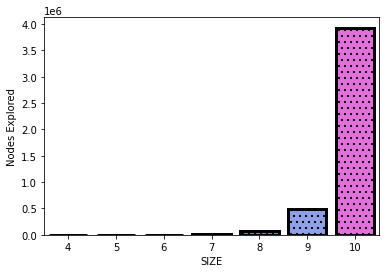

In [ ]:
X = [4, 5, 6, 7, 8, 9, 10]

'''nodes_exp_l = []
mynodes_exp = []
optimal_cost = []
myoptimal_cost = []
time_t = []
mytime_t = []'''
n_e=sns.barplot(x=X, y=nodes_exp_l, palette="husl",lw=3,ec="black",hatch="..")
n_e.set(xlabel ="SIZE", ylabel = "Nodes Explored")



**Observations:**


*   The graph above represents number of nodes explored for each trial size.
*   We can see as the size increases the number of nodes explored increases exponentially. This happens because as we increase the size the number of states also increase, so ultimately this leads to more number of states explored.



[Text(0, 0.5, 'Optimal Cost'), Text(0.5, 0, 'SIZE')]

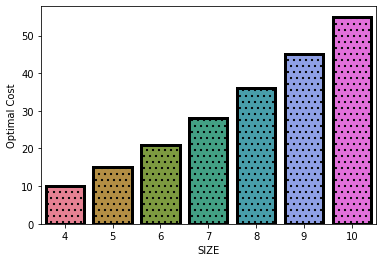

In [ ]:
o_c=sns.barplot(x=X, y=optimal_cost, palette="husl",lw=3,ec="black",hatch="..")
o_c.set(xlabel ="SIZE", ylabel = "Optimal Cost")

**Observations:**


*   The above graph represents the optimal cost for each trial size.
*   As size increases the optimal cost also increases. This happens because as we increase the size the cost to reach the goal state also increases.



[Text(0, 0.5, 'Time in seconds'), Text(0.5, 0, 'SIZE')]

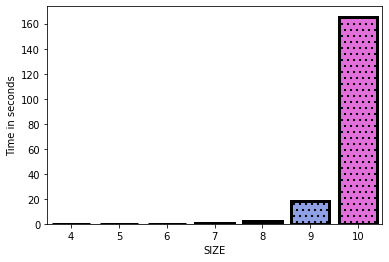

In [ ]:
t_t = sns.barplot(x=X, y=time_t, palette="husl",lw=3,ec="black",hatch="..")
t_t.set(xlabel ="SIZE", ylabel = "Time in seconds")

**Observations:**


*   The above graph represents time for finding the goal state for each trial.
*   We can see as we increase the size the time also increases very significantly. This happens because increase in size leads to increase in number of states and thus the search takes more time to find the goal state. 



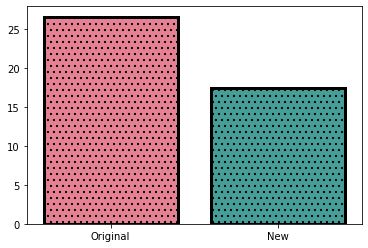

In [ ]:
time_h = []
time_h.append(np.mean(time_t))
time_h.append(np.mean(mytime_t))
heuristics = ["Original", "New"]
sns.barplot(x=heuristics, y=time_h, palette="husl",lw=3,ec="black",hatch="..")


**Observations:**


*   The above graph helps in comparing the original heuristic with the new heuristic.
*   Y-axis shows the mean time of all the trials for each heuristic function.


*   We can clearly notice that new heuristic function returns better time than our original heuristic function.
*   So, we can see that the new heuristic function performs better than the original heuristic function.



